In [1]:
import pandas as pd
import numpy as np

import psycopg2 as pg
import pandas.io.sql as psql

import matplotlib.pyplot as plt

%matplotlib inline
 
# get connected to the database


In [2]:
furniture_finish = ['cherry','white','espresso', 'black','chrome','mahogony', 'walnut', 'oak','birch', 'gold', 'brass', 'beech', 'bronze', 'pine', 'silver']
upholstery_material = ["leather", "linen", "polyurethane", "polyester", "cotton", "vinyl", "velvet", "chenille", "microfiber", "wool", "faux leather"]
materials = [furniture_finish, "wood", upholstery_material, "plastic", "fabric", "metal", "rattan"]

In [3]:
furniture_finish = ['cherry','white','espresso', 'black','chrome','mahogony', 'walnut', 'oak','birch', 'gold', 'brass', 'beech', 'bronze', 'pine', 'silver']
upholstery_material = ["leather", "linen", "polyurethane", "polyester", "cotton", "vinyl", "velvet", "chenille", "microfiber", "wool", "faux leather"]
other_materials = ["wood", "plastic", "fabric", "metal", "rattan"]
materials = set()
materials.update(furniture_finish)
materials.update(upholstery_material)
materials.update(other_materials)

In [4]:
materials

{'beech',
 'birch',
 'black',
 'brass',
 'bronze',
 'chenille',
 'cherry',
 'chrome',
 'cotton',
 'espresso',
 'fabric',
 'faux leather',
 'gold',
 'leather',
 'linen',
 'mahogony',
 'metal',
 'microfiber',
 'oak',
 'pine',
 'plastic',
 'polyester',
 'polyurethane',
 'rattan',
 'silver',
 'velvet',
 'vinyl',
 'walnut',
 'white',
 'wood',
 'wool'}

In [5]:
connection = pg.connect(dbname='brent', user='brent', host='localhost', password='brent')

In [6]:
cur = connection.cursor()

In [7]:
# result = cur.query("SELECT * FROM categories;")

In [8]:
# cur.execute("SELECT * FROM categories;")

# the_data = cur.fetchall()

# colnames = [desc[0] for desc in cur.description]

# the_frame = pd.DataFrame(the_data)
# the_frame.columns = colnames
# the_frame.head()

In [9]:
# the_frame.head()

In [ ]:
# cur.description

In [10]:
table_names = ['addresses','categories',
            'categories_products','category_features','clients',
               'companies','featured_items','invitations','order_items',
               'orders','popular_items','products','projects','projects_collaborators',
               'projects_products','proposal_product','proposals','saved_searches',
               'schema_version','showrooms','showrooms_vendors','spring_session',
               'spring_session_attributes','styles','user_addresses',
               'users','vendors','vendors_styles']

In [11]:
d = {}
for i in table_names:
    cur.execute('SELECT * FROM {}'.format(i))
    the_data = cur.fetchall()
    colnames = [desc[0] for desc in cur.description]

    d[i] = pd.DataFrame(the_data)
    if len(d[i].columns) == len(colnames):
        d[i].columns = colnames
    else:
        print i

categories_products


In [12]:
for i in table_names:
    print i
    print d[i].head()

addresses
   id          address_line1 address_line2           city country state  \
0   1  28 Parker Ave Apt 202          None  San Francisco      US    CA   
1   2              17287 abc          None       woodside      US    ca   
2   3              17287 abc          None       woodside      US    ca   
3   4  28 Parker Ave Apt 202          None  San Francisco      US    CA   
4   5  28 Parker Ave Apt 202          None  San Francisco      US    CA   

  zip_code phone company email contact  
0    94118  None    None  None    None  
1    94062  None    None  None    None  
2    94062  None    None  None    None  
3    94118  None    None  None    None  
4    94118  None    None  None    None  
categories
   id                        breadcrumb                name  parent_id
0   1                       Accessories         Accessories        NaN
1   2    Accessories > Bath Accessories    Bath Accessories        1.0
2   3  Accessories > Bedding and Throws  Bedding and Throws        1.

In [13]:
cur.execute("SELECT * FROM categories_products;")

the_data = cur.fetchall()

colnames = [desc[0] for desc in cur.description]

the_frame = pd.DataFrame(the_data)
# the_frame.columns = colnames
the_frame.head()


""


## Tables with no valuable information
categories_products is an empty table

clients: 80 rows has email, user_id (of creator), name, deleted (only 2 True), updated timestamp


proposal_product: client feedback on items. Only 172 rows of feedback. Positive ("this looks like a cool feature") / Negative ("Oh Hell No!") notes ... and only 5 blocks of text.

## Tables with potentially interesting information

Addresses: Low priority. with 43 states and 94 cities represented, could I find a relationship between styles and location

Categories: Turn into a set of objects with lower nodes holding item information and higher nodes as collections of that information. Determine the node level for useful information.

projects_products: multiple rows per project. user_id, product_ids. Identify relationships by product --> if in same project, add to relationship list. Convert to default dictionary or counter of related products
materials - finish: pull info from description for materials (800+ baskets, ~7 items per basket ... 5.7k unique items.



## Table Relationships
Addresses (1178 rows) used in users? clients? ?????
    id (primary key), address_line1 (427 entries), address_line2 (79 entries), city (427), country (1178), state (427), zip_code (1178 *required information), phone (124), company (10), email (10), contact (10)
    
  

### Addresses

In [14]:
d['addresses'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178 entries, 0 to 1177
Data columns (total 11 columns):
id               1178 non-null int64
address_line1    427 non-null object
address_line2    79 non-null object
city             427 non-null object
country          1178 non-null object
state            427 non-null object
zip_code         1178 non-null object
phone            124 non-null object
company          10 non-null object
email            10 non-null object
contact          10 non-null object
dtypes: int64(1), object(10)
memory usage: 101.3+ KB


In [15]:
for i in d['addresses'].columns:
    print i, len(d['addresses'][i].unique())

id 1178
address_line1 122
address_line2 40
city 94
country 1
state 43
zip_code 375
phone 64
company 7
email 7
contact 8


### Category Features

There are 413 category "types".
There are 107 category "classifications".

In [16]:
d['category_features'][d['category_features']['category_id'] ==2]

,category_id,feature
27,2,bath set
28,2,towel rack
29,2,toilet paper holder
30,2,towel bar
31,2,toilet paper bar
32,2,bathroom shelf
33,2,towel
34,2,bath sheet
35,2,bath towel
36,2,shower curtain


In [17]:
for i in d['category_features'].columns:
    print i, len(d['category_features'][i].unique())

category_id 107
feature 413


In [18]:
test = list(d['category_features']['feature'])

In [19]:
# test = sorted(test)
# print test

In [20]:
d['category_features'][d['category_features']['feature'] == 'text']

,category_id,feature


### Clients


In [21]:
for i in d['clients'].columns:
    print i, len(d['clients'][i].unique())

id 80
deleted 2
name 77
email 77
updated 80
user_id 60


### Users

In [22]:
ret = set()
for i in d['users'].columns:
    if i != 'custom_data':
        if i == 'user_roles':
            for j in d['users'][i]:
                ret.update(j)
            print i, ret
        else:
            print i, len(d['users'][i].unique())

id 3126
email 3126
full_name 3058
stormpathurl 1795
logourl 141
company 2971
plaid_access_token 22
stripe_customer_id 44
shopify_customer_id 1489
created_at 3121
enabled 1
verified 2
password 3123
updated 3123
user_roles set([u'ADMIN', u'USER'])
first_name 1458
last_name 2545
google_id 98


In [23]:
d['users'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126 entries, 0 to 3125
Data columns (total 19 columns):
id                     3126 non-null int64
email                  3126 non-null object
full_name              3125 non-null object
stormpathurl           1794 non-null object
logourl                140 non-null object
company                3060 non-null object
plaid_access_token     21 non-null object
stripe_customer_id     43 non-null object
shopify_customer_id    1488 non-null float64
custom_data            3126 non-null object
created_at             3120 non-null datetime64[ns]
enabled                3126 non-null bool
verified               3126 non-null bool
password               3126 non-null object
updated                3122 non-null datetime64[ns]
user_roles             3126 non-null object
first_name             3126 non-null object
last_name              3126 non-null object
google_id              97 non-null object
dtypes: bool(2), datetime64[ns](2), float64(1), int6

## How to download meta data from algolia system

Search does not currently work with API. MUST HIDE AND ALIAS passwords before uploading

In [24]:
from algoliasearch import algoliasearch
# from pymongo import MongoClient
# import json
import time


In [25]:
# client = MongoClient()

In [ ]:
# del db_products
# db_products = client.db_products

In [ ]:
# import unicodedata

In [ ]:
400*40/31./60


# cl = algoliasearch.Client("88M6DNE4VR", 'a1d710a60be87b6f6688be3d3b13221c')
# index = cl.init_index('di_raw_products_prod')

In [ ]:
# print cl.get_api_key_acl("a1d710a60be87b6f6688be3d3b13221c")

In [ ]:
# query = {'query':''}
# d_test = index.search("table")#, "attributesToRetrieve": "hits"})

In [ ]:
# print len(d_test['hits'])
# d_test['hits']

In [ ]:
# for key, val in d_dyn.iteritems():

# index.search({"query":webscrapingtest,"filter":"hitsPerPage"})

# index = client.init_index("contacts")

# import time
# individual_page_hits = {}
# for key, val in d_dyn.iteritems():
#     time.sleep(5)
#     query = {'query':val}
#     d_test = index.search(
#                {"query":query, "attributesToRetrieve": "hits"})
# #                    request_options=request_options)
#     individual_page_hits[key] = d_test["hits"]

In [ ]:
# for key, val in individual_page_hits.iteritems():
#     print key, val
    

In [ ]:
# # items = n/dev/load("scraped_data_as_dict.npy")
# items_max = max(items.iterkeys())
# print items_max

In [ ]:

# c = 0
# for idx,i in enumerate(d['products']['dynamoid']):
#     if c == 75000:
#         break
#     if idx > items_max:
#         try:
#             query = i
#             items[idx] = index.search(query)['hits']
#             c+=1
#             continue
#         except:
#             print 'fail: {}'.format(i)

In [ ]:
# len(items)
# items = {}

In [ ]:
# import numpy as np
# np.save('scraped_data_as_dict375k.npy', items)

In [ ]:
# # items[84856]
# c=0
# for key, val in items.iteritems():
#     if val == []:
#         c+=1
# print items_max -c - 375000

In [ ]:
# # mongodb client stuff

# query = "" # Empty query will match all records

# res = index.browse_all({"query":query})

# # while "cursor" in res:
# #     print res
# for hit in res:
# #     h = json.loads(hit)
# #     df = pd.read_json(h)
# #     print df
#     print hit
#     db_products.insert(res)

# query = "" # Empty query will match all records

# res = index.search({"query": query}, None)

# while "cursor" in res:
#     print res
#     db_products.insert(res)
#     # Filters are embeded in the cursor
#     res = index.search(None, res["cursor"])
    

In [ ]:
# print db_products

In [ ]:
# cols = db_products.collection_names

In [ ]:
# for c in cols:
#     print c

## Upload transactions / orders data from Shopify

In [26]:
df_transactions = pd.read_csv('/home/brent/Downloads/transactions_export.csv')

In [27]:
df_transactions.head()

,Order,Name,Kind,Gateway,Created At,Status,Amount,Currency,Card Type
0,171163090950,#1244,capture,NaN,2018-01-09 10:07:46 -0800,success,2160.31,USD,NaN
1,169617096710,#1243,capture,NaN,2018-01-08 10:48:09 -0800,success,131.84,USD,NaN
2,162022326278,#1241,capture,NaN,2018-01-03 10:42:49 -0800,success,279.00,USD,NaN
3,161044201478,#1240,capture,NaN,2018-01-02 17:55:24 -0800,success,55.00,USD,NaN
4,142717616134,#1239,sale,manual,2017-12-21 14:47:08 -0800,success,2950.00,USD,NaN


In [28]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 9 columns):
Order         208 non-null int64
Name          208 non-null object
Kind          208 non-null object
Gateway       63 non-null object
Created At    208 non-null object
Status        208 non-null object
Amount        208 non-null float64
Currency      208 non-null object
Card Type     30 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 14.7+ KB


In [29]:
df_transactions['Kind'].unique()

array(['capture', 'sale', 'refund', 'void'], dtype=object)

In [30]:
good_outcomes = ['capture', 'sale']
df_transactions_go = df_transactions[(df_transactions['Kind'] == 'capture') | (df_transactions['Kind'] == 'sale')]

In [31]:
df_transactions_go.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 207
Data columns (total 9 columns):
Order         188 non-null int64
Name          188 non-null object
Kind          188 non-null object
Gateway       54 non-null object
Created At    188 non-null object
Status        188 non-null object
Amount        188 non-null float64
Currency      188 non-null object
Card Type     27 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 14.7+ KB


In [32]:
df_transactions_go.describe()

,Order,Amount
count,1.880000e+02,188.000000
mean,2.512542e+10,923.708404
std,4.024382e+10,1740.678216
min,4.580904e+09,1.000000
25%,5.368233e+09,144.250000
50%,6.303138e+09,331.070000
75%,2.255419e+10,1015.480000
max,1.711631e+11,13844.970000


In [33]:
df_transactions_go['Amount'].sum() / 188


923.708404255319

In [34]:
df_orders = pd.read_csv('/home/brent/Downloads/orders_export.csv')

In [35]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 67 columns):
Name                           568 non-null object
Email                          555 non-null object
Financial Status               244 non-null object
Paid at                        160 non-null object
Fulfillment Status             244 non-null object
Fulfilled at                   62 non-null object
Accepts Marketing              244 non-null object
Currency                       244 non-null object
Subtotal                       244 non-null float64
Shipping                       244 non-null float64
Taxes                          244 non-null float64
Total                          244 non-null float64
Discount Code                  0 non-null float64
Discount Amount                244 non-null float64
Shipping Method                158 non-null object
Created at                     568 non-null object
Lineitem quantity              568 non-null int64
Lineitem name             

### Transactions / Payments
There have been 568. Averaging at **Classified**

### Method types
There are three: manual (inputs), Shopify Payments (TBD), Bank Deposit (as described), NaN

### Unique Items Purchased
 1054

In [36]:
df_orders['Payment Method'].unique()

array([nan, 'manual', 'Shopify Payments', 'Bank Deposit'], dtype=object)

In [37]:
len(d['orders']['shopify_id'].unique())

1054

In [38]:
df_orders['Total'].sum() / 244

748.2156147540987

In [39]:
df_orders['Total'].describe()

count      244.000000
mean       748.215615
std       1567.106280
min          0.000000
25%         83.305000
50%        289.950000
75%        725.740000
max      13844.970000
Name: Total, dtype: float64

In [40]:
totals = df_orders['Total'][(df_orders['Total'] > 0.0)]

In [41]:
totals.mean()

800.721973684211

## Order Size

/home/brent/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


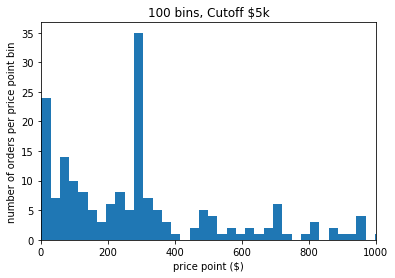

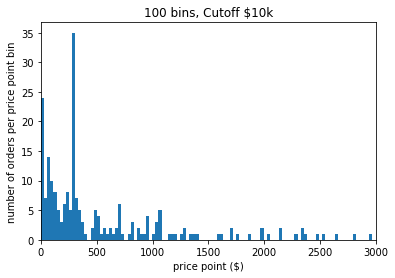

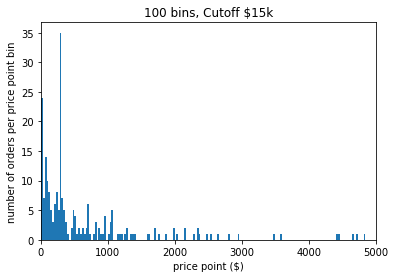

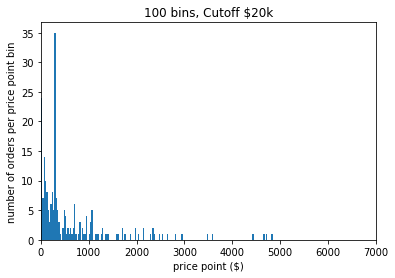

In [42]:

for i in range(0,4):
    fig, ax = plt.subplots(1,1)

    ax.set_xlim(0,(i+1)*2000-1000)
    ax.set_title('100 bins, Cutoff ${}k'.format(5*(i+1)))
    ax.set_xlabel('price point ($)')
    ax.set_ylabel('number of orders per price point bin')
    ax.hist(totals,bins=500)
    fig.show()


## Products and how the calls work for product information
Product title is not in the dataset. All are set to "None" or left blank.


In [43]:

d['products'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401907 entries, 0 to 401906
Data columns (total 6 columns):
id            401907 non-null int64
dynamoid      401907 non-null object
price         50538 non-null object
shopify_id    2707 non-null float64
image         56100 non-null object
title         56118 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 18.4+ MB


In [44]:
titles = d['products']['title'].head(1000)

In [45]:
images = d['products']['image'].head(1000)

In [46]:
images.unique()

array([None], dtype=object)

In [47]:
# d_dyn = {}
# c = 0
# for idx,i in enumerate(d['products']['dynamoid']):
#     if c == 100:
#         break
#     elif "|" not in i:
#         d_dyn[d['products']['id'][idx]] = i
#         c+=1
#     else:
#         d_dyn[d['products']['id'][idx]] = i.split('|')[-1]
#         c+=1

In [48]:
# c3 = 0
# c1 = 0
# for key,val in d_dyn.iteritems():
#     if len(val) == 3:
        
#         c3+=1
#     elif len(val) == 1:
#         c1 += 1
#         last = key
# print c1, c3, last

In [49]:
# len(d_dyn)

In [50]:
# s = set()
# for key, val in d_dyn.iteritems():
#     s.add(val)


In [51]:
# len(s)

In [52]:
# webscrapingtest = d_dyn[last]

In [53]:
# d['products']['dynamoid_list_0'] = np.nan
# d['products']['dynamoid_list_1'] = np.nan
# d['products']['dynamoid_list_2'] = np.nan

# for idx,i in enumerate(d['products']['dynamoid']):
#     lst = i.split('|')
#     for j in xrange(0,3):
#         d['products']['dynamoid_list_{}'.format(j)][idx] = lst[j]

In [54]:
test = d['products']['dynamoid'][1]

In [55]:
type(test)

str

In [56]:
print test

product|3|-810119018


In [57]:
testsplit = test.split('|')

In [58]:
print testsplit

['product', '3', '-810119018']


## Projects_products

There are 5786 unique products in the projects_products table, in 836 projects. (6.92 items per basket)

In [59]:
d['projects_products'].head()

,project_id,product_id,id,created_at,author_id
0,342904,40624,1664,2017-02-22 12:11:18.419,342802
1,342906,95888,1665,2017-02-22 22:08:09.993,151238
2,342907,304156,1666,2017-02-22 22:11:04.604,342905
3,342907,304157,1667,2017-02-22 22:11:13.147,342905
4,342907,96139,1668,2017-02-22 22:12:27.017,342905


In [60]:
d['projects_products'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6355 entries, 0 to 6354
Data columns (total 5 columns):
project_id    6355 non-null int64
product_id    6355 non-null int64
id            6355 non-null int64
created_at    6355 non-null datetime64[ns]
author_id     6355 non-null int64
dtypes: datetime64[ns](1), int64(4)
memory usage: 248.3 KB


In [61]:
for i in d['projects_products'].columns:
    print i, len(d['projects_products'][i].unique())

project_id 836
product_id 5786
id 6355
created_at 4694
author_id 425


## Proposal_product


In [62]:
d['proposal_product'].head()

,id,client_note,client_price,designer_note,display_order,image,quantity,status,title,trade_price,updated,product_id,proposal_id,description,trade_shipping,client_shipping
0,366391,None,1573.00,None,2,https://cdn.shopify.com/s/files/1/1595/8663/pr...,1,NaN,Grasshopper Wall Lamp,1573.00,2017-08-30 01:40:44.306,None,366390,,0.00,0.00
1,350130,,278.00,None,0,di/products/e551c6c336ae0621b3be943da80018c7,1,0.0,Living on the Edge Sofa Table,241.50,2017-06-27 18:17:46.633,None,350122,None,0.00,0.00
2,350128,,0.00,None,1,di/products/product|3|1261197341,8,0.0,Colvin Console Table,458.00,2017-06-27 18:17:46.655,None,350122,None,0.00,0.00
3,350129,Oh hell no!,255.67,None,2,di/products/ceb19954b768fdeae7e96c83d927004f,1,1.0,Claudius Cabinet,229.99,2017-06-27 18:17:46.672,None,350122,None,0.00,0.00
4,350127,Looks too juvenile.,214.00,None,3,di/products/2a03bd6ff5dc7e8b5114c39a4330e5b9,1,1.0,Mid-Century 2 Dr Console Table,199.50,2017-06-27 18:17:46.685,None,350122,None,0.00,0.00


In [63]:
d['proposal_product'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 16 columns):
id                 172 non-null int64
client_note        18 non-null object
client_price       172 non-null object
designer_note      0 non-null object
display_order      172 non-null int64
image              172 non-null object
quantity           172 non-null int64
status             18 non-null float64
title              172 non-null object
trade_price        172 non-null object
updated            172 non-null datetime64[ns]
product_id         0 non-null object
proposal_id        172 non-null int64
description        156 non-null object
trade_shipping     172 non-null object
client_shipping    172 non-null object
dtypes: datetime64[ns](1), float64(1), int64(4), object(10)
memory usage: 21.6+ KB


In [64]:
for i in d['proposal_product'].columns:
    print i, len(d['proposal_product'][i].unique())

id 172
client_note 6
client_price 121
designer_note 1
display_order 14
image 143
quantity 7
status 3
title 142
trade_price 109
updated 133
product_id 1
proposal_id 60
description 35
trade_shipping 5
client_shipping 8


In [65]:
d[
    'proposal_product'
]

,id,client_note,client_price,designer_note,display_order,image,quantity,status,title,trade_price,updated,product_id,proposal_id,description,trade_shipping,client_shipping
0,366391,None,1573.00,None,2,https://cdn.shopify.com/s/files/1/1595/8663/pr...,1,NaN,Grasshopper Wall Lamp,1573.00,2017-08-30 01:40:44.306,None,366390,,0.00,0.00
1,350130,,278.00,None,0,di/products/e551c6c336ae0621b3be943da80018c7,1,0.0,Living on the Edge Sofa Table,241.50,2017-06-27 18:17:46.633,None,350122,None,0.00,0.00
2,350128,,0.00,None,1,di/products/product|3|1261197341,8,0.0,Colvin Console Table,458.00,2017-06-27 18:17:46.655,None,350122,None,0.00,0.00
3,350129,Oh hell no!,255.67,None,2,di/products/ceb19954b768fdeae7e96c83d927004f,1,1.0,Claudius Cabinet,229.99,2017-06-27 18:17:46.672,None,350122,None,0.00,0.00
4,350127,Looks too juvenile.,214.00,None,3,di/products/2a03bd6ff5dc7e8b5114c39a4330e5b9,1,1.0,Mid-Century 2 Dr Console Table,199.50,2017-06-27 18:17:46.685,None,350122,None,0.00,0.00
5,350133,None,0.00,None,0,di/products/c7bf389460a5b1516ce27a90cdbf3a1c,1,NaN,Simpson Console,258.99,2017-06-27 19:32:52.958,None,350132,None,0.00,0.00
6,350149,None,0.00,None,1,di/products/566d3ad1f80f097480b025428a67a722,1,NaN,DOMINION CAMBRIDGE BED WITH LEATHER PANEL FOR ...,0.00,2017-06-27 20:18:22.960,None,350135,None,0.00,0.00
7,350150,None,0.00,None,4,di/products/da1893608d9957367a5ce7e26569e0e9,1,NaN,8789 UPHOLSTERED BED,0.00,2017-06-27 20:18:22.961,None,350135,None,0.00,0.00
8,350151,None,0.00,None,3,di/products/2fd976c073e6d4d29fd6bc4eee0f99c6,1,NaN,Tompkins Upholstered Bed with Low Footboard (Q...,0.00,2017-06-27 20:18:22.963,None,350135,None,0.00,0.00
9,350152,None,3000.00,None,5,customproducts/bxrvwabzxxvbld0bd5xc,1,NaN,really groovy sofa,1500.00,2017-06-27 20:18:22.964,None,350135,None,0.00,0.00


## Saved_searches
Only 34 entries - not useful for proposal data for now

State is the call to get to where the last screen view can be called

Would need to scrape detail from the screen at which "state is saved".

In [66]:
d['saved_searches'].head()

,id,name,state,updated,user_id
0,1,Print rugs,q=print&nR[processedImages][=][0]=1,2017-06-01 18:56:45.490,151223
1,3,Leather case goods.,q=leather&hFR[categories][0]=Furniture%20%3E%2...,2017-06-05 19:20:53.785,151223
2,5,Favorite Vendors,q=&fE[site][0]=brentanofabrics.com&fE[site][1]...,2017-06-06 16:03:55.859,350004
3,6,"Sideboards from CFC, Noir, & Palecheck",q=&dFR[site][0]=customfurniturela.com&dFR[site...,2017-06-06 18:22:02.818,151234
4,7,"Lighting without Hammerton, Ollix",q=&fE[site][0]=olliix.com&fE[site][1]=hammerto...,2017-06-06 18:31:22.277,151234


In [67]:
d['saved_searches'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
id         34 non-null int64
name       34 non-null object
state      34 non-null object
updated    34 non-null datetime64[ns]
user_id    34 non-null int64
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 1.4+ KB


In [68]:
for i in d['saved_searches'].columns:
    print i, len(d['saved_searches'][i].unique())

id 34
name 34
state 32
updated 34
user_id 27


# Web Scraping test

# Get grouping information

In [69]:
d['showrooms'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 5 columns):
id         624 non-null int64
city       624 non-null object
name       624 non-null object
state      624 non-null object
updated    623 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 24.4+ KB


In [70]:
d['showrooms_vendors'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507 entries, 0 to 1506
Data columns (total 2 columns):
showroom_id    1507 non-null int64
vendor_id      1507 non-null int64
dtypes: int64(2)
memory usage: 23.6 KB


In [71]:
for i in d['showrooms_vendors'].columns:
    print i, len(d['showrooms_vendors'][i].unique())

showroom_id 619
vendor_id 287


In [72]:
d['vendors'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 11 columns):
id               481 non-null int64
name             481 non-null object
url              481 non-null object
logourl          414 non-null object
bio              480 non-null object
price_level      263 non-null object
updated          481 non-null datetime64[ns]
hidden           480 non-null object
verified_only    481 non-null bool
email            126 non-null object
return_policy    113 non-null object
dtypes: bool(1), datetime64[ns](1), int64(1), object(8)
memory usage: 38.1+ KB


In [73]:
for i in d['vendors'].columns:
    print i, len(d['vendors'][i].unique())

id 481
name 477
url 481
logourl 415
bio 374
price_level 5
updated 475
hidden 3
verified_only 2
email 29
return_policy 36


# Upload into mongodb

In [74]:
# pymongo.version
import pprint
import pymongo
import pyspark
import pandas as pd
import numpy as np
import json


In [75]:
cl = pymongo.MongoClient()

coll = cl.desinc_collection.products_db
coll2 = cl.desinc_db.products_coll

In [ ]:
pprint.pprint(coll.find_one())

In [ ]:
# pprint.pprint(coll.find_one({'objectID':}))

In [ ]:
import re
import bson
import collections  # From Python standard library.
from bson.codec_options import CodecOptions

In [ ]:
# regex = re.compile(r'product|3|-810119018')
cursor = coll.find()

In [ ]:
cl.drop_database(cl.desinc_db)

In [ ]:
for doc in cursor:
    for key, val in doc.iteritems():
        if key == "_id":
            continue
        else:
#             row = bson.raw_bson.RawBSONDocument(val)
        
#             print val
            dic = {}
            for i in val:
                
#             row = bson.raw_bson.(val)
#             print row
#         bson.iteritems(row):
                coll2.insert_one(i)



#         options = CodecOptions(document_class=collections.OrderedDict)
#         decoded_doc = bson.BSON.decode(row, codec_options=options)
#         print decoded_doc

In [76]:
# cl.drop_database(cl.desinc_collection2)
cursor = coll2.find()
df = pd.DataFrame(list(cursor))

In [85]:
from designerinc.Data import pull_df_from_mongo
# with open("designerinc/Data"):
#     import df
# from 'designerinc/Data/' import df.py
# # from Data import df
# df = df.run()

In [86]:
df = pull_df_from_mongo.main()

In [98]:
randos = df.sample(n=3)

In [99]:
randos

,_highlightResult,_id,_styles,brand,cleanSpecs,colors,diffbotUri,dimensions,directCategory,hidden,...,specs,styles,text,title,tradePrice,type,upc,url,variations,visibleVerified
130680,"{u'sku': {u'matchLevel': u'none', u'value': u'...",5a6021d8f636802e547fb315,NaN,NaN,NaN,NaN,c95f5801bffea7f272adfd4c94bc9c87,"{u'width': u'24', u'depth': u'22', u'height': ...",Furniture > Seating > Lounge and Club Chairs,0.0,...,"{u'Finish': u'PF307 / Swedish Blue', u'Dimensi...","[Traditional, Transitional]",Chesapeake Chair - Arm,Chesapeake Chair - Arm,NaN,NaN,NaN,http://www.davidiatesta.com/product-details/ch...,NaN,0.0
95656,"{u'sku': {u'matchLevel': u'none', u'value': u'...",5a6021caf636802e547f2a45,NaN,NaN,NaN,NaN,d100c17cb6d480eaeacc38ffac49bbcd,NaN,Furniture > Tables > Desks > Executive Desk,0.0,...,{},[Traditional],AVAILABLE IN BLACK LACQUER FINISH WITH GILDED ...,ITALIAN HOOF-FOOTED DESK WITH TOOLED LEATHER TOP,NaN,NaN,NaN,http://www.cachecollection.com/details.cfm?ID=...,NaN,1.0
8022,{u'hierarchicalCategories': {u'lvl0': [{u'matc...,5a6021a9f636802e547dd3f3,"Transitional,Arts and Crafts,Industrial,Mid Ce...",NaN,{},NaN,product|3|1173576564,NaN,Wallcoverings > Wallpaper,0.0,...,"{u'minimum_order': u'15 Yds', u'maintenance': ...","[Arts and Crafts, Asian, Coastal, Contemporary...",Vinyl Max's Metallic Raffia - Brown Sugar,Vinyl Max's Metallic Raffia - Brown Sugar,NaN,product,NaN,http://www.phillipjeffries.com/products/7726--...,NaN,0.0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186626 entries, 0 to 186625
Data columns (total 51 columns):
_highlightResult           186626 non-null object
_id                        186626 non-null object
_styles                    42266 non-null object
brand                      21554 non-null object
cleanSpecs                 14853 non-null object
colors                     0 non-null float64
diffbotUri                 186626 non-null object
dimensions                 85678 non-null object
directCategory             178158 non-null object
hidden                     105523 non-null float64
hierarchicalCategories     177920 non-null object
images                     181254 non-null object
in_page_variations         7808 non-null object
isbn                       0 non-null float64
mpn                        2601 non-null object
normalizedDimensions       186254 non-null object
objectID                   186626 non-null object
offerPriceDetails          39833 non-null object
other

In [78]:
df.head()

,_highlightResult,_id,_styles,brand,cleanSpecs,colors,diffbotUri,dimensions,directCategory,hidden,...,specs,styles,text,title,tradePrice,type,upc,url,variations,visibleVerified
0,"{u'sku': {u'matchLevel': u'none', u'value': u'...",5a6021a7f636802e547db49d,NaN,NaN,NaN,NaN,product|3|-810119018,NaN,Furniture > Case Goods > Book Cases and Etageres,NaN,...,{},"[Asian, Coastal , Contemporary, Country , Indu...",Details\nRustic Pine 3 Tiered Bookcase\nDimens...,Accent Furniture,450.0,product,NaN,http://redlabelhome.com/index.php/accent-furni...,NaN,NaN
1,"{u'sku': {u'matchLevel': u'none', u'value': u'...",5a6021a7f636802e547db49e,NaN,NaN,NaN,NaN,product|3|-810118923,NaN,NaN,NaN,...,{},"[Asian, Coastal , Contemporary, Country , Indu...",3 Tiered Display Stand (Wood + Iron)\nDimensio...,Accent Furniture,250.0,product,NaN,http://redlabelhome.com/index.php/accent-furni...,NaN,NaN
2,"{u'sku': {u'matchLevel': u'none', u'value': u'...",5a6021a7f636802e547db49f,NaN,NaN,{},NaN,product|3|-810118769,NaN,Furniture > Tables > Side Table,NaN,...,{u'botton_side_table-short-16_h_x_20_d': u'Dim...,"[Asian, Coastal , Contemporary, Country , Indu...","Details\nBotton Side Table - Short - 16"" H x 2...",Accent Furniture,149.0,product,NaN,http://redlabelhome.com/index.php/accent-furni...,NaN,NaN
3,"{u'sku': {u'matchLevel': u'none', u'value': u'...",5a6021a7f636802e547db4a0,NaN,NaN,NaN,NaN,product|3|-810119019,NaN,NaN,NaN,...,NaN,NaN,Details\nRustic Pine 5 Shelves Bookcase\nDimen...,Accent Furniture,499.0,product,NaN,http://redlabelhome.com/index.php/accent-furni...,NaN,NaN
4,"{u'sku': {u'matchLevel': u'none', u'value': u'...",5a6021a7f636802e547db4a1,NaN,NaN,NaN,NaN,product|3|-810119022,NaN,Furniture > Tables > Console,NaN,...,{},"[Asian, Coastal , Contemporary, Country , Indu...",Details\nRustic Pine Console Table\nDimensions...,Accent Furniture,375.0,product,NaN,http://redlabelhome.com/index.php/accent-furni...,NaN,NaN


# Drop Columns

In [79]:
drop_cols = ['_id','cleanSpecs','colors',"isbn","prefixCode","priceRange","primaryImage","productOrigin","projects","otherImages","saveAmount","saveAmountDetails"]
df.drop(drop_cols,axis=1,inplace=True)

# Extract From Columns

_highlightResult text, site and tile

In [80]:
lst = list(df['_highlightResult'])
grab_cols = ["text","site","title"]



for col in grab_cols:
    
    df["HR{}".format(col)] = 0
    load1 = []
    for i in lst:
        try:
            load1.append(i[col])
        except:
            load1.append(np.NaN)
    df["HR{}".format(col)] = load1

### extract from HRtext

In [81]:
lst = list(df['HRtext'])
grab_cols = ['value']

for col in grab_cols:
    load1 = []
    for i in lst:
        try:
            load1.append(i[col])
        except:
            load1.append(np.NaN)
    df['HRtext'] = load1

### extract from HRsite

In [82]:
lst = list(df['HRsite'])
grab_cols = ['value']

for col in grab_cols:
    load1 = []
    for i in lst:
        try:
            load1.append(i[col])
        except:
            load1.append(np.NaN)
    df['HRsite'] = load1

### extract from HRtitle

In [83]:
lst = list(df['HRtitle'])
grab_cols = ['value']

for col in grab_cols:
    load1 = []
    for i in lst:
        try:
            load1.append(i[col])
        except:
            load1.append(np.NaN)
    df['HRtitle'] = load1

### remove orignial column

In [84]:
df.drop("_highlightResult",axis=1,inplace=True)

# Check styles for useful data

In [85]:
check = df['_styles']

In [86]:
check2 = set(check)

In [87]:
categories = set()
for i in check2:
    try:
        lst = str(i).split(",")
        categories.update(lst)
    except:
        continue
categories.remove('nan')

In [88]:
categories

{'Abstract',
 'Art Deco',
 'Art Nouveau',
 'Arts and Crafts',
 'Asian',
 'Baroque',
 'Classic',
 'Coastal',
 'Coastal ',
 'Contemporary',
 'Country',
 'Country ',
 'Floral',
 'Folk Art',
 'Geometric',
 'Gothic',
 'Hollywood Regency',
 'Industrial',
 'Louis XVI',
 'Mid Century',
 'Mid-Century',
 'Modern',
 'Neoclassical',
 'Prints',
 'Regency',
 'Rococo',
 'Rustic',
 'Solid',
 'Southwestern',
 'Stripe',
 'Traditional',
 'Transitional',
 'Transitional ',
 'Tribal',
 'Victorian',
 'Woven'}

## Update styles, create dummies

In [89]:
check = df['_styles']
for i in list(categories):
    col = []
    df["{}_style".format(str(i))] = 0
    for row in check:
        if str(i) in str(row):
            col.append(1)
        else:
            col.append(0)
    df['{}_style'.format(str(i))] = col
    

In [90]:
df.drop("_styles",axis=1,inplace=True)

### Combine style columns, fix column titles

In [91]:
df['Mid-Century_style'] = df['Mid Century_style'] + df['Mid-Century_style']
df['Coastal_style'] = df['Coastal _style'] + df['Coastal_style']
df['Country_style'] = df['Country _style'] + df['Country_style']


In [92]:

comb = ['Mid Century_style','Coastal _style',"Country_style"]
df.drop(comb,axis=1,inplace=True)

### Remove spaces in cols

In [93]:
cols = list(df.columns)
for idx,col in enumerate(cols):
    if " " in str(col):
        cols[idx] = str(col).replace(" ","")
    else:
        cols[idx] = str(col)
df.columns = cols

In [94]:
cols

['brand',
 'diffbotUri',
 'dimensions',
 'directCategory',
 'hidden',
 'hierarchicalCategories',
 'images',
 'in_page_variations',
 'mpn',
 'normalizedDimensions',
 'objectID',
 'offerPriceDetails',
 'overriddenStyles',
 'pageUrl',
 'predominantColorsResult',
 'priceLevel',
 'private',
 'processedCategory',
 'processedImages',
 'productId',
 'regularPrice',
 'regularPriceDetails',
 'resolvedPageUrl',
 'shippingAmount',
 'showrooms',
 'site',
 'sku',
 'specs',
 'styles',
 'text',
 'title',
 'tradePrice',
 'type',
 'upc',
 'url',
 'variations',
 'visibleVerified',
 'HRtext',
 'HRsite',
 'HRtitle',
 'Mid-Century_style',
 'Rustic_style',
 'ArtsandCrafts_style',
 'Geometric_style',
 'Rococo_style',
 'FolkArt_style',
 'Regency_style',
 'Neoclassical_style',
 'Stripe_style',
 'Floral_style',
 'Country_style',
 'Transitional_style',
 'Solid_style',
 'Tribal_style',
 'Traditional_style',
 'Victorian_style',
 'ArtNouveau_style',
 'HollywoodRegency_style',
 'Baroque_style',
 'Woven_style',
 'Prin

## Check the brand column

2980 unique brands.
May use data for styles and copy info over

In [95]:
check = df['brand']

In [96]:
print "total unique brand items: ", len(set(check)), "  total items: ",len(check)

total unique brand items:  2980   total items:  186626


## review cleanSpecs
only None,  nan, and {}, so remove col.

In [97]:
# check = df['cleanSpecs']

In [98]:
# print "total unique cleanSpecs items: ", len(set(check)), "  total items: ",len(check)

In [99]:
check2 = list(check)
print check2[0]

nan


In [100]:
c = 0
for i in check2:
    if i in [{},None,check2[0]]:
        pass
    else:
        print i
        c+=1
    if c==100:
        break

Confetti
Confetti
GLOBAL
Paris
Interiors
GLOBAL
Leandre
GLOBAL
Porto
Dennis
GLOBAL
Bongo
Japanese Paper
Manhattan
GLOBAL
Palazzo
Japanese Paper
June Sofa
Sassari
Sassari
Carlisle
Timo
Miramont
Bradington-Young
Bradington-Young
B&W
Bradington-Young
Hatteras Hammocks
Interiors
Madison
Greer
Bradington-Young
Vizcaya
BOLLE
Asta
Chicago Heights
Deluna
Seeton Sidechair
GLOBAL
Franklin
GLOBAL
Nexus
Odeon
Bradington-Young
WREN
Jade
Curio Cabinets
Ripley
Antler
Bradington-Young
Midas
Interiors
Bradington-Young
Ansel
Bradington-Young
Eaton
Chute Vase
URBN
URBN
URBN
Creslow
Giatti
Normandie Manor
CHICO
Briana
Jasper
River Sketch
BOLTON
GLOBAL
Rowley
Barclay
Interiors
Soho Luxe
Westall
Lancaster
GLOBAL
Home Accents
Pacific Canyon
Moana
Stanton
Ninghsha
Vernazza Vase
Hatteras Hammocks
Shutters
GLOBAL
Rancho
Bradington-Young
Interiors
AUBREY
Lumiere
Danielle
Solstice
Luna
Padima
Jute
Jute
Bradington-Young
Caribou
Hatteras Hammocks
Manhattan


In [101]:
cols = df.columns
print cols

Index([u'brand', u'diffbotUri', u'dimensions', u'directCategory', u'hidden',
       u'hierarchicalCategories', u'images', u'in_page_variations', u'mpn',
       u'normalizedDimensions', u'objectID', u'offerPriceDetails',
       u'overriddenStyles', u'pageUrl', u'predominantColorsResult',
       u'priceLevel', u'private', u'processedCategory', u'processedImages',
       u'productId', u'regularPrice', u'regularPriceDetails',
       u'resolvedPageUrl', u'shippingAmount', u'showrooms', u'site', u'sku',
       u'specs', u'styles', u'text', u'title', u'tradePrice', u'type', u'upc',
       u'url', u'variations', u'visibleVerified', u'HRtext', u'HRsite',
       u'HRtitle', u'Mid-Century_style', u'Rustic_style',
       u'ArtsandCrafts_style', u'Geometric_style', u'Rococo_style',
       u'FolkArt_style', u'Regency_style', u'Neoclassical_style',
       u'Stripe_style', u'Floral_style', u'Country_style',
       u'Transitional_style', u'Solid_style', u'Tribal_style',
       u'Traditional_style', u'V

### diffbotUri is the same as objectID column



In [102]:

check = df['diffbotUri']
check2 = df['objectID']
c=0
for idx,i in enumerate(check):
    if check2[idx] == i:
        c+=1
print "identicals: ",c
print "total unique diffbotUri items: ", len(set(check)), "  total items: ",len(check)

identicals:  186626
total unique diffbotUri items:  173454   total items:  186626


In [103]:
df.drop('diffbotUri',axis=1,inplace=True)

### Check dimensions

In [104]:
check = df['dimensions']

In [105]:
c=0
for i in check:
    if i not in [check[0],{}]:
        print i
        c+=1
    if c == 100:
        break

{u'width': u'34', u'height': u'29'}
{u'width': u'32', u'height': u'45'}
{u'width': u'36', u'height': u'24'}
{u'width': u'10', u'height': u'29'}
{u'width': u'24', u'height': u'21'}
{u'width': u'48', u'height': u'26'}
{u'width': u'48', u'height': u'26'}
{u'width': u'36', u'height': u'24'}
{u'width': u'8-34', u'height': u'16'}
{u'width': u'36', u'height': u'24'}
{u'width': u'36', u'height': u'24'}
{u'width': u'36', u'height': u'24'}
{u'width': u'36', u'height': u'24'}
{u'width': u'36', u'height': u'24'}
{u'width': u'36', u'height': u'24'}
{u'width': u'36', u'height': u'24'}
{u'width': u'36', u'height': u'24'}
{u'width': u'36', u'height': u'24'}
{u'width': u'36', u'height': u'24'}
{u'width': u'Max.  71', u'depth': u'28', u'height': u'40.50'}
{u'width': u'14.75', u'depth': u'14', u'height': u'26.50'}
{u'width': u'89', u'depth': u'Max.  41', u'height': u'38'}
{u'width': u'89', u'depth': u'43', u'height': u'38'}
{u'width': u'36', u'height': u'24'}
{u'width': u'10', u'height': u'25'}
{u'width'

In [106]:
check = df['dimensions']
dimensions = set()
for i in check:
    if i in [check[0],{}]:
        continue
    
    else:
        for dim,val in i.iteritems():
            dimensions.add(dim)
#     dimensions.add(type(i))
print dimensions

set([u'diameter', u'arm_width', u'diam', u'projection', u'wide', u'back_rail_height', u'length', u'deep', u'height', u'width', u'depth', u'overall_height', u'footboard_height', u'tall', u'seat_height', u'seat_width', u'arm_height', u'seat_depth', u'arm height', u'backplate'])


In [107]:
# [u'diameter', u'arm_width', u'diam', u'projection', u'wide', u'back_rail_height', u'length', u'deep', u'height', u'width', u'depth', u'overall_height', u'footboard_height', u'tall', u'seat_height', u'seat_width', u'arm_height', u'seat_depth', u'arm height', u'backplate']

In [108]:
for dim in list(dimensions):
    name = "dim_{}".format(str(dim))
    df[name] = 0
    col = []
    print name
    c = 0
    for idx,i in enumerate(check):
        if idx%20000 == 0:
            print idx,name, c
        try:
            if dim in i.iterkeys():
                c+=1
                col.append(i[dim])
            else:
                col.append(0)
        except:
            col.append(0)
    df[name] = col
                

dim_diameter
0 dim_diameter 0
20000 dim_diameter 0
40000 dim_diameter 57
60000 dim_diameter 57
80000 dim_diameter 57
100000 dim_diameter 628
120000 dim_diameter 770
140000 dim_diameter 1404
160000 dim_diameter 1408
180000 dim_diameter 1408
dim_arm_width
0 dim_arm_width 0
20000 dim_arm_width 0
40000 dim_arm_width 0
60000 dim_arm_width 0
80000 dim_arm_width 0
100000 dim_arm_width 0
120000 dim_arm_width 0
140000 dim_arm_width 70
160000 dim_arm_width 71
180000 dim_arm_width 71
dim_diam
0 dim_diam 0
20000 dim_diam 0
40000 dim_diam 150
60000 dim_diam 962
80000 dim_diam 3760
100000 dim_diam 4188
120000 dim_diam 4661
140000 dim_diam 4868
160000 dim_diam 4889
180000 dim_diam 4890
dim_projection
0 dim_projection 0
20000 dim_projection 0
40000 dim_projection 0
60000 dim_projection 5
80000 dim_projection 5
100000 dim_projection 81
120000 dim_projection 81
140000 dim_projection 81
160000 dim_projection 81
180000 dim_projection 81
dim_wide
0 dim_wide 0
20000 dim_wide 0
40000 dim_wide 0
60000 dim_wid

In [109]:
lst=list(df.columns)
print lst
# df.drop([72,74],axis=1,inplace=True)

['brand', 'dimensions', 'directCategory', 'hidden', 'hierarchicalCategories', 'images', 'in_page_variations', 'mpn', 'normalizedDimensions', 'objectID', 'offerPriceDetails', 'overriddenStyles', 'pageUrl', 'predominantColorsResult', 'priceLevel', 'private', 'processedCategory', 'processedImages', 'productId', 'regularPrice', 'regularPriceDetails', 'resolvedPageUrl', 'shippingAmount', 'showrooms', 'site', 'sku', 'specs', 'styles', 'text', 'title', 'tradePrice', 'type', 'upc', 'url', 'variations', 'visibleVerified', 'HRtext', 'HRsite', 'HRtitle', 'Mid-Century_style', 'Rustic_style', 'ArtsandCrafts_style', 'Geometric_style', 'Rococo_style', 'FolkArt_style', 'Regency_style', 'Neoclassical_style', 'Stripe_style', 'Floral_style', 'Country_style', 'Transitional_style', 'Solid_style', 'Tribal_style', 'Traditional_style', 'Victorian_style', 'ArtNouveau_style', 'HollywoodRegency_style', 'Baroque_style', 'Woven_style', 'Prints_style', 'Industrial_style', 'Classic_style', 'Abstract_style', 'Modern_

In [110]:
for i in dimensions:
    try:
        name = "dim_{}".format(str(i))
        print name, "unique:   ", len(set(df[name])), "usable:  ", sum([1 if j != 0 else 0 for j in list(df[name])])
    except:
        continue

dim_diameter unique:    324 usable:   1409
dim_arm_width unique:    14 usable:   71
dim_diam unique:    625 usable:   4893
dim_projection unique:    33 usable:   81
dim_wide unique:    13 usable:   14
dim_back_rail_height unique:    27 usable:   1768
dim_length unique:    990 usable:   12318
dim_deep unique:    51 usable:   149
dim_height unique:    3013 usable:   70078
dim_width unique:    2865 usable:   64278
dim_depth unique:    1559 usable:   41631
dim_overall_height unique:    11 usable:   13
dim_footboard_height unique:    51 usable:   182
dim_tall unique:    2 usable:   1
dim_seat_height unique:    142 usable:   6004
dim_seat_width unique:    112 usable:   666
dim_arm_height unique:    77 usable:   3468
dim_seat_depth unique:    74 usable:   828
dim_arm height unique:    20 usable:   34
dim_backplate unique:    2 usable:   5


In [111]:
# df['dim_diameter'][0]

In [112]:
# df.drop(['dim_dim_diameter', 'dim_dim_arm_width', 'dim_dim_diam', 'dim_dim_projection', 'dim_dim_wide', 'dim_dim_back_rail_height', 'dim_dim_length', 'dim_dim_deep', 'dim_dim_height', 'dim_dim_width', 'dim_dim_depth', 'dim_dim_overall_height', 'dim_dim_footboard_height', 'dim_dim_tall', 'dim_dim_seat_height', 'dim_dim_seat_width', 'dim_dim_arm_height', 'dim_dim_seat_depth', 'dim_dim_arm height', 'dim_dim_backplate'],axis=1,inplace=True)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186626 entries, 0 to 186625
Data columns (total 92 columns):
brand                      21554 non-null object
dimensions                 85678 non-null object
directCategory             178158 non-null object
hidden                     105523 non-null float64
hierarchicalCategories     177920 non-null object
images                     181254 non-null object
in_page_variations         7808 non-null object
mpn                        2601 non-null object
normalizedDimensions       186254 non-null object
objectID                   186626 non-null object
offerPriceDetails          39833 non-null object
overriddenStyles           105580 non-null float64
pageUrl                    43663 non-null object
predominantColorsResult    168993 non-null object
priceLevel                 128823 non-null object
private                    92535 non-null float64
processedCategory          186626 non-null object
processedImages            186626 non-null ob

In [114]:
check = df['directCategory']

In [115]:
print "total unique directCategory items: ", len(set(check)), "  total items: ",len(check)

total unique directCategory items:  157   total items:  186626


In [116]:
set(check)

{nan,
 u'Accessories',
 u'Accessories > Bath Accessories',
 u'Accessories > Bedding and Throws',
 u'Accessories > Bookends',
 u'Accessories > Bowls and Baskets',
 u'Accessories > Boxes',
 u'Accessories > Candles and Candle Holders',
 u'Accessories > Clocks',
 u'Accessories > Coat Racks',
 u'Accessories > Decorative Objects',
 u'Accessories > Desk Accessories',
 u'Accessories > Fireplace',
 u'Accessories > Jewelry Boxes and Cabinets',
 u'Accessories > Lanterns',
 u'Accessories > Mirrors',
 u'Accessories > Picture Frames',
 u'Accessories > Pillows',
 u'Accessories > Screens',
 u'Accessories > Serveware',
 u'Accessories > Silk Plants',
 u'Accessories > Trays',
 u'Accessories > Vases and Vessels',
 u'Accessories > Wall Shelves',
 u'Art',
 u'Art > Childrens',
 u'Art > Sculptures',
 u'Art > Wall Art',
 u'Art > Wall Sculpture',
 u'Bedding and Throws > Coverlets > Bed Skirt > Cal king',
 u'Bedding and Throws > Sheeting > Cases > King',
 u'Bedding and Throws > Sheeting > Fitted > King',
 u'Bedd

In [117]:
from collections import Counter


In [118]:
counter = Counter(check)


In [119]:
dict_test = dict(counter)
# df_test = pd.DataFrame.from_dict(dict_test)
# for key,val in counter.iteritems():
#     key,val
# df_test.head()

In [120]:
for key, value in dict_test.iteritems():
    if value >2000:
        print key, value

nan 8468
Furniture > Tables > Side Table 6551
Accessories 5932
Accessories > Vases and Vessels 4735
Furniture > Seating > Dining and Side Chairs 9250
Rugs and Carpets > Area Rugs 20026
Furniture > Tables > Dining 3526
Accessories > Decorative Objects 3395
Furniture > Beds > Beds 2160
Accessories > Mirrors 4452
Wallcoverings > Wallpaper 4060
Furniture > Seating > Lounge and Club Chairs 11635
Accessories > Pillows 2839
Furniture > Tables > Coffee and Cocktail 3895
Furniture > Seating > Ottomans 3192
Lighting > Table Lamps 6612
Accessories > Bedding and Throws 2576
Art > Wall Art 10085
Lighting > Chandeliers and Pendants 8750
Furniture > Tables > Console 2141
Lighting > Wall Lights and Sconces 4643
Furniture > Seating > Sofa > Sofa 3495
Furniture > Seating > Stools 5815


In [121]:
check = df['hierarchicalCategories']

In [122]:
check[0]

{u'lvl0': [u'Furniture'],
 u'lvl1': [u'Furniture > Case Goods'],
 u'lvl2': [u'Furniture > Case Goods > Book Cases and Etageres']}

In [123]:
check = df['hidden']
# print "total unique hidden items: ", len(set(check)), "  total items: ",len(check)

In [124]:
nans = 0
c = 0
x = check[0]
print "X: ",x
for i in check:
#     print i, type(i)
    if i == 0.:
        c+=1
    else:
        nans+=1
#         nans+=1
#     elif i == 0.0:
#         nans+=1
#     else:
# #         print type(i)
#         c+=1
#         if c ==20:
#             break
print nans
print c

X:  nan
81103
105523


In [125]:
df.drop('hidden',axis=1,inplace=True)


In [126]:
check = df['images']

In [127]:
check[0]

[{u'primary': 1,
  u'title': u'Rustic Pine 3 Tiered Bookcase',
  u'url': u'http://redlabelhome.com/media/catalog/product/cache/4/image/570x495/9df78eab33525d08d6e5fb8d27136e95/8/8/8805.jpg'}]

In [128]:
col = []
for i in df['images']:
    try:
        col.append(i[0]['url'])
    except:
        col.append(0)
df['images'] = col

In [129]:
check = df['images']

In [130]:
check[0]

u'http://redlabelhome.com/media/catalog/product/cache/4/image/570x495/9df78eab33525d08d6e5fb8d27136e95/8/8/8805.jpg'

In [172]:
check = df['styles']
sets = set()
# print "total unique styles items: ", len(set(check)), "  total items: ",len(check)
# counter = Counter(check)
for i in check:
    try:
        len(i)
        sets.add(",".join(i))
    except:
        continue
    

In [205]:
col = []
col2 = []
col3 = []
for i in check:
    ret = ""
    try:
        col.append(len(i))
        if col[-1] > 1:
            col2.append(1)
            col3.append(1)
        elif col[-1] == 1:
            col2.append(0)
            col3.append(1)
        else:
            col2.append(0)
            col3.append(0)
    except:
        col.append(0)
        col2.append(0)
        col3.append(0)
        continue

In [207]:
print "total classifications and rows:  ",sum(col), len(col)
print "total multiple classifications and rows:  ",sum(col2), len(col2)
print "total classification rows:  ",sum(col3), len(col3)

total classifications and rows:   526026 186626
total multiple classifications and rows:   113243 186626
total classification rows:   141966 186626


### look into fast text
 - eda why fields and visualization
 - feature selection
 - model analysis - fill in the classifier

In [133]:
c=0
for i in sets:
    print i
    c+=1
    if c==20:
        break

Industrial,Mid Century,Transitional
Mid Century,Rustic,Traditional,Transitional
Contemporary,Modern,Rustic
Industrial,Mid Century,Rustic
Coastal ,Industrial,Rustic
Art Deco,Contemporary,Industrial,Mid Century,Traditional
Country,Industrial,Mid Century,Modern,Rustic,Transitional
Art Deco,Traditional,Transitional
Contemporary,Modern,Rustic,Transitional
Arts and Crafts,Coastal ,Contemporary,Country ,Hollywood Regency,Industrial,Rustic,Traditional,Transitional 
Arts and Crafts,Asian,Coastal,Contemporary,Country,Industrial,Mid Century,Rustic,Traditional,Transitional
Asian,Hollywood Regency,Mid Century,Regency
Mid Century
Coastal,Hollywood Regency,Modern
Asian,Contemporary,Transitional
Contemporary,Traditional,Transitional
Arts and Crafts,Contemporary,Industrial,Traditional,Transitional
Asian,Traditional,Transitional 
Arts and Crafts,Asian,Coastal,Contemporary,Country,Hollywood Regency,Industrial,Modern,Rustic,Traditional,Transitional
Contemporary,Rustic,Traditional


In [171]:
col = []
for i in df['styles']:
    try:
        col.append(",".join(i).replace(" ",""))
    except:
        col.append("no_styles")
df['styles_list'] = col

In [135]:
check = df['text']
check2 = df["HRtext"]

In [136]:
print (check[0])
print (check2[0])

Details
Rustic Pine 3 Tiered Bookcase
Dimensions - 59"L x 43"H x 16"W
Minimum Order Quantity- 1
Case Quantity - 1
Details
Rustic Pine <em>3</em> Tiered Bookcase
Dimensions - 59"L x 43"H x 16"W
Minimum Order Quantity- 1
Case Quantity - 1


In [137]:
for i in check[:1]:
    text = str(i).lower()
    print text.count("quantity")
    

2


In [138]:
for material in list(materials):
    mat = material.lower()
    name = 'mat_{}'.format(mat)
    df[name] = 0
    col = []

    for text in df['text']:
        try:
            strtext = str(text).lower()
            col.append(strtext.count(mat))
        except:
            col.append(0)
    df[name] = col

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186626 entries, 0 to 186625
Columns: 123 entries, brand to mat_rattan
dtypes: float64(5), int64(64), object(54)
memory usage: 175.1+ MB


In [140]:
for material in list(materials):
    mat = material.lower()
    name = 'mat_{}'.format(mat)
    c = 0
    for i in df[name]:
        c+=i
    print material, c

gold 6153
espresso 520
faux leather 268
plastic 287
chenille 177
cotton 4181
mahogony 0
fabric 8753
chrome 1691
cherry 1130
oak 2961
pine 1071
walnut 4779
wood 27541
black 9039
microfiber 1000
white 10735
wool 6651
polyurethane 166
vinyl 764
birch 484
beech 267
velvet 464
brass 7937
silver 5483
bronze 4681
polyester 6721
leather 5278
metal 10441
linen 3599
rattan 628


In [141]:
check = list(df['text'])
idx = 0

In [142]:
for i in range(idx,idx+10):
    print check[i]
    if i == idx+9:
        idx+=10
    

Details
Rustic Pine 3 Tiered Bookcase
Dimensions - 59"L x 43"H x 16"W
Minimum Order Quantity- 1
Case Quantity - 1
3 Tiered Display Stand (Wood + Iron)
Dimensions -
Minimum Order Quantity- 1
Case Quantity - 1
Details
Botton Side Table - Short - 16" H x 20" D
Dimensions - 16" H x 20" D
Minimum Order Quantity- 1
Case Quantity - 1
Details
Rustic Pine 5 Shelves Bookcase
Dimensions - 79"H x 39"L x 16"W
Minimum Order Quantity- 1
Case Quantity - 1
Details
Rustic Pine Console Table
Dimensions - 31.5"H x 47"L x 16"W
Minimum Order Quantity- 1
Case Quantity - 1
Details
Natural Finish Coffee Table - 27.5" W x 20" H
Dimensions - 27.5" W x 20" H
Minimum Order Quantity- 1
Case Quantity - 1
Details
Botton Side Table Large - 34" H x 20" D
Dimensions - 34" H x 20" D
Minimum Order Quantity- 1
Case Quantity - 1
Details
Antiqued Gray Bar Chair - 44" H x 20" W
Dimensions - 44" H x 20" W
Minimum Order Quantity- 1
Case Quantity - 1
Details
Antiqued Gray 3 Tiered Display- 82" H x 59"L x 21" W
Dimensions - 82" H

Add:
iron
natural
gray
rustic
antiqued
oxidized
glass

In [143]:
df["new_text"] = df['HRtext'].fillna('')

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer as tfidfv
import scipy

In [145]:
test_df = tfidfv()
texts = list(df['new_text'])

In [146]:
results = test_df.fit_transform(texts)

In [147]:
col = []
c = 0
for idx,i in enumerate(test):
    try:
        col.append(len(i.encode('ascii','replace')))
    except:
        try:
            if i == float(np.nan):
                col.append('foundit')
            else:
                col.append('fail')
                print type(i)
        except:
            col.append('fail')
            c+=1
            print i, idx
            if c==10:
                break

In [148]:
counter = Counter(col)
counter['foundit']

0

In [149]:
test = df['HRtext']

In [150]:
test = test.fillna("")

In [151]:
results.check_format

<bound method csr_matrix.check_format of <186626x47656 sparse matrix of type '<type 'numpy.float64'>'
	with 4246634 stored elements in Compressed Sparse Row format>>

In [152]:
# limit to the seating
seating_df = df[df['directCategory'] == "Furniture > Seating > Dining and Side Chairs"]

In [153]:
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram


## K-MEANS

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(seating_df['new_text'])
features = vectorizer.get_feature_names()
kmeans = KMeans()
kmeans.fit(X)


# 2. Print out the centroids.
print "cluster centers:"
print kmeans.cluster_centers_


# 3. Find the top 10 features for each cluster.
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print "top features for each cluster:"
for num, centroid in enumerate(top_centroids):
    print "%d: %s" % (num, ", ".join(features[i] for i in centroid))

cluster centers:
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    9.26817995e-03   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   1.94712132e-03   8.99266658e-05 ...,   2.13515211e-04
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.71370103e-03   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   6.93314133e-04]]
top features for each cluster:
0: hooker, furniture, room, dining, chair, arm, sanctuary, splatback, upholstered, corsica
1: patara, seat, steel, feet, provides, rest, cushion, padded, comfort, 19
2: eiffel, seat, upholstered, steel, arm, wool, lead, time, variety, organic
3: dervish, loss, seat, harpu

In [154]:

# 4. Limit the number of features and see if the words of the topics change.
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(seating_df['new_text'])
features = vectorizer.get_feature_names()
kmeans = KMeans(n_clusters=int(len(seating_df['new_text'])**(0.5)))
kmeans.fit(X)
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print "top features for each cluster with 1000 max features:"
for num, centroid in enumerate(top_centroids):
    print "%d: %s" % (num, ", ".join(features[i] for i in centroid))

top features for each cluster with 1000 max features:
0: vintage, indian, kantha, c20, fabric, daniel, 01, c40, 10, c50
1: seat, patara, feet, legs, steel, level, uneven, surfaces, user, distinctive
2: chair, zipper, diner, duo, dream, draco, dowel, dove, double, dolce
3: crescent, sword, seat, 23, 75, steel, unique, 17, 20, large
4: mw, eiffel, legs, wires, used, black, steel, natural, metal, seat
5: wire, eiffel, seat, steel, upholstered, wool, time, lead, metal, weight18
6: hilton, armless, accent, chair, zipper, displayed, duo, dream, draco, dowel
7: harput, round, wear, fabrics, year, loss, camira, seat, cuz68, cuz15
8: specs, 24, chair, 22, dining, 25, 20, 23, 37, 33
9: soho, steel, seat, 26, chrome, classy, coating, finished, armchair, sled
10: star, eiffel, arm, seat, upholstered, 24, 27, matt, nickel, help
11: dining, chair, black, eiffel, zipper, early, dream, draco, dowel, dove
12: pasha, 18, 22, seat, low, 34, strengthened, chairs, ergonomic, stretchers
13: arm, chair, dini

In [155]:
# 5. Print out the titles of a random sample of the products assigned to each
# cluster to get a sense of the topic.
assigned_cluster = kmeans.transform(X).argmin(axis=1)
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, X.shape[0])[assigned_cluster==i]
    sample_products = np.random.choice(cluster, 3, replace=False)
    print "cluster %d:" % i
    for product in sample_products:
        print "    %s" % seating_df.iloc[product]['title']

cluster 0:
    C41-32(01) Scandinavian modern style side chair in vintage Indian kantha fabric
    Comments on: C50-5(01) Daniel Side Chair in vintage Indian kantha fabric
    C20-10(4) Century in vintage Indian kantha fabric
cluster 1:
    Patara Star Chair, Black Powder Steel Base, Grey Leatherette
    Patara 4 Star Chair, Matt Brushed Nickel Base, Grey Fabric (Oalo)
    Patara 4 Star Chair, Chrome Base, Grey Leatherette
cluster 2:
    Touchstone Side Chair
    Terry Side Chair
    SIDE CHAIR
cluster 3:
    Crescent Sword Dining Chair, Walnut Veneer Steel Base, Gray And Cream Camira Wool
    Crescent Sword Dining Chair, Walnut Veneer Steel Base, Gold Italian Ppm
    Crescent Sword Dining Chair, Walnut Veneer Steel Base, Gold Velvet
cluster 4:
    Eiffel Mw Dining Chair, Stainless Steel Base, Black Ppm
    Eiffel Mw Dining Chair, Stainless Steel Base, Orange Ppm
    Eiffel Mw Dining Chair, Natural Veneer Steel Base, Orange Ppm
cluster 5:
    Eiffel Wire Dining Chair, Chrome Base, Red 

    Eiffel Plywood Dining Chair, Natural Finish Base, Pistachio Camira Wool
    Eiffel Plywood Dining Chair, Natural Finish Base, Black Leather (Top-Grain)
    Eiffel Plywood Dining Chair, Walnut Finish Base, Red Camira Wool
cluster 46:
    LONDON DC SIDE CHAIR
    #DC-3093-S Hyde Park Dining Side Chair
    LONDON DC SIDE CHAIR
cluster 47:
    Crescent Mw Chair, Walnut Veneer Steel Base, Black Ppm
    Crescent Mw Chair, Walnut Veneer Steel Base, Black Leatherette
    Crescent Mw Chair, Natural Veneer Steel Base, Black Leather (Top Grain)
cluster 48:
    Harput Wood Chair, American Walnut Base, Amber Camira Wool
    Harput Sword Chair, Natural Veneer Steel Base, Orange Camira Wool
    Harput Wood Chair, American Walnut Base, Smoke Blue camira wool
cluster 49:
    Eiffel Star Dining Chair, Natural Veneer Steel Base, Deep Maroon Casmira Wool
    Eiffel Star Dining Chair, Stainless Steel Base, Bone Ppm
    Eiffel Star Dining Chair, Stainless Steel Base, Grey And Bronze Italian Ppm
cluster 

In [156]:
kmeans = KMeans(n_clusters=int(len(seating_df['new_text'])**(0.5)))
kmeans.fit(X)
assigned_cluster = kmeans.transform(X).argmin(axis=1)
print "top 2 topics for each cluster"
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, X.shape[0])[assigned_cluster==i]
    topics = seating_df.iloc[cluster]['styles_list']
    most_common = Counter(topics).most_common(5)
    print "Cluster {}: {}".format(i, most_common[0][0])
    if len(most_common) > 1:
        print " {}".format(most_common[1][0])

top 2 topics for each cluster
Cluster 0: Contemporary,Mid Century,Transitional
 Mid Century
Cluster 1: Contemporary,Modern
 no_styles
Cluster 2: Contemporary,Modern
Cluster 3: Contemporary,Modern,Transitional
 no_styles
Cluster 4: no_styles
 Contemporary,Modern,Transitional
Cluster 5: Contemporary,Modern
Cluster 6: Contemporary,Modern,Transitional
 no_styles
Cluster 7: Contemporary,Modern
Cluster 8: no_styles
 Contemporary,Traditional,Transitional
Cluster 9: Contemporary,Modern
Cluster 10: Contemporary,Modern
Cluster 11: Contemporary,Modern
Cluster 12: Contemporary,Modern
Cluster 13: Contemporary,Modern
 Contemporary,Traditional,Transitional
Cluster 14: Contemporary,Modern
Cluster 15: no_styles
 Traditional
Cluster 16: Contemporary,Traditional,Transitional
 Asian,Coastal,Contemporary,Modern,Transitional
Cluster 17: Contemporary,Modern
 no_styles
Cluster 18: Contemporary,Modern
Cluster 19: Contemporary,Modern
Cluster 20: Contemporary,Modern
Cluster 21: Contemporary,Modern
Cluster 22: Co

In [165]:

small_mask = np.zeros(len(seating_df)).astype(bool)
indices = np.arange(len(seating_df))
for category in seating_df['styles_list'].unique():
    category_mask = (seating_df['styles_list']==category).values
    new_index = np.random.choice(indices[category_mask])
    small_mask[new_index] = True
additional_indices = np.random.choice(indices[np.logical_not(small_mask)],
                                      360 - sum(small_mask),
                                      replace=False)
small_mask[additional_indices] = True
small_df = seating_df.iloc[small_mask]



/home/brent/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


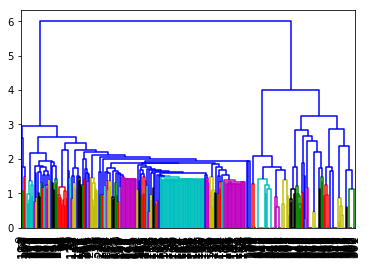

In [166]:

# Verify that this is good:
# assert len(small_df) == 100
# assert len(small_df['styles_list'].unique()) == \
#     len(seating_df['styles_list'].unique())


# 2-3. The first step to using scipy's Hierarchical clustering is to first find
# out how similar our vectors are to one another.

# first vectorize...
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
small_X = vectorizer.fit_transform(small_df['new_text'])
small_features = vectorizer.get_feature_names()

# now get distances
distxy = squareform(pdist(small_X.todense(), metric='cosine'))

link = linkage(distxy, method='complete')
# 5. Using scipy's dendrogram function plot the linkages as
# a hierachical tree.
dendro = dendrogram(link, color_threshold=1.5, leaf_font_size=12)
plt.show()

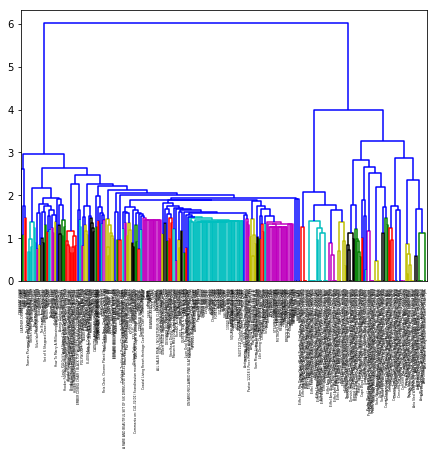

In [170]:
## HIERARCHICAL TOPICS
# 1. To make your clusters more interpretable, change the labels on the data
# to be the titles of the articles.
dendro = dendrogram(link, color_threshold=1.5, leaf_font_size=3,
                    labels=small_df['title'].values)
# fix spacing to better view dendrogram and the labels
plt.subplots_adjust(top=.99, bottom=0.05, left=0.05, right=.99)
plt.savefig('dendrogram.png')
plt.show()



In [164]:
df['styles_list']

0         Asian,Coastal ,Contemporary,Country ,Industria...
1         Asian,Coastal ,Contemporary,Country ,Industria...
2         Asian,Coastal ,Contemporary,Country ,Industria...
3                                                 no_styles
4         Asian,Coastal ,Contemporary,Country ,Industria...
5         Asian,Coastal ,Contemporary,Country ,Industria...
6         Asian,Coastal ,Contemporary,Country ,Industria...
7         Asian,Coastal ,Contemporary,Country ,Industria...
8         Asian,Coastal ,Contemporary,Country ,Industria...
9                                                 no_styles
10        Asian,Coastal ,Contemporary,Country ,Industria...
11        Asian,Coastal ,Contemporary,Country ,Industria...
12        Asian,Coastal ,Contemporary,Country ,Industria...
13        Asian,Coastal ,Contemporary,Country ,Industria...
14        Asian,Coastal ,Contemporary,Country ,Industria...
15        Asian,Coastal ,Contemporary,Country ,Industria...
16        Asian,Coastal ,Contemporary,Co

In [1]:
df.info()

NameError: name 'df' is not defined